# CISC 367 Midterm Messy Notebook

<em> Ishaan Thakker </em>

* When first coming up with exactly what I wanted my research to include one stock such as APPL and the S&P 500 index
* Using this idea and inspiration from Dr. Bart I realized that it was probably a good idea to include many different companies and analyze them to possibly compare different parts of the market, where the risk is and isn't

Copy over details from midterm background and add more definitions and insight on analysis

Set up the data



In [89]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


#Apple 
AAPL = pd.read_csv("data/AAPL.csv")
#Microsoft 
MSFT = pd.read_csv("data/MSFT.csv")
#Tesla
TSLA = pd.read_csv("data/TSLA.csv")
#Nike
NKE = pd.read_csv("data/NKE.csv")
#Gamestop
GME = pd.read_csv("data/GME.csv")
#S&P 500
SP500 = pd.read_csv("data/constituents_csv.csv")

AAPL.sort_values(by = ['Date'], inplace = True, ascending = False)
MSFT.sort_values(by = ['Date'], inplace = True, ascending = False)
TSLA.sort_values(by = ['Date'], inplace = True, ascending = False)
NKE.sort_values(by = ['Date'], inplace = True, ascending = False)
GME.sort_values(by = ['Date'], inplace = True, ascending = False)
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10162 entries, 10161 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10162 non-null  object 
 1   Open       10161 non-null  float64
 2   High       10161 non-null  float64
 3   Low        10161 non-null  float64
 4   Close      10161 non-null  float64
 5   Adj Close  10161 non-null  float64
 6   Volume     10161 non-null  float64
dtypes: float64(6), object(1)
memory usage: 635.1+ KB


In [90]:
sec_list = SP500["Sector"].unique()
print(len(sec_list))
sec_list

11


array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

Using Stock Market Data

In [91]:
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
10161,2021-04-01,123.660004,124.180000,122.489998,123.000000,123.000000,74957400.0
10160,2021-03-31,121.650002,123.519997,121.150002,122.150002,122.150002,118323800.0
10159,2021-03-30,120.110001,120.400002,118.860001,119.900002,119.900002,85671900.0
10158,2021-03-29,121.650002,122.580002,120.730003,121.389999,121.389999,80819200.0
10157,2021-03-26,120.349998,121.480003,118.919998,121.209999,121.209999,93958900.0


### What can we learn from a particular stocks change in price over time?

<AxesSubplot:>

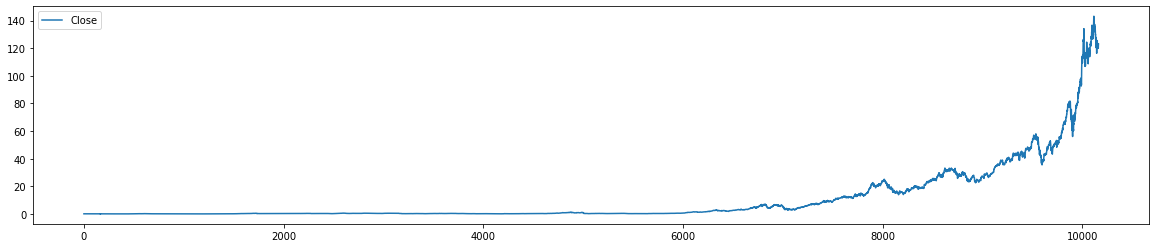

In [92]:
#FIX: Figure out how to plot with certain dates
sort = (AAPL['Date'] > '2010-01-01') & (AAPL['Date'] <= '2021-01-01')
AAPL['Close'].plot(legend = True, figsize = (20,4))

<AxesSubplot:>

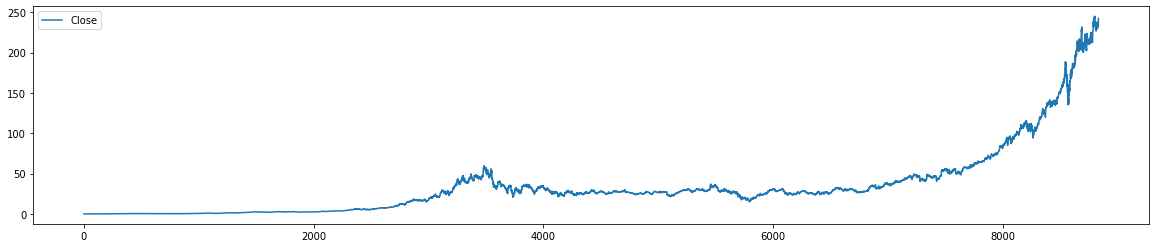

In [93]:
MSFT['Close'].plot(legend = True, figsize = (20,4))

<AxesSubplot:>

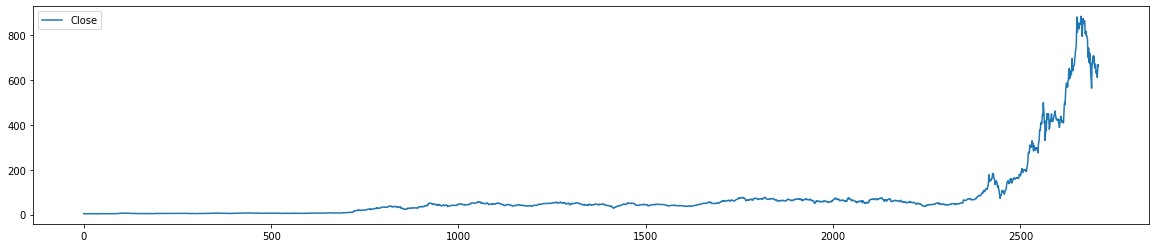

In [94]:
TSLA['Close'].plot(legend = True, figsize = (20,4))

<AxesSubplot:>

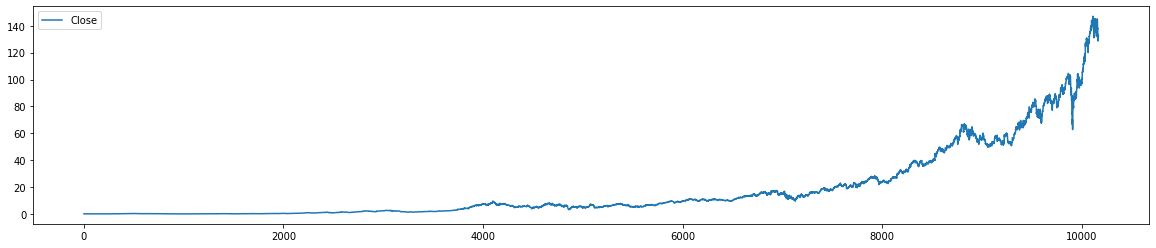

In [95]:
NKE['Close'].plot(legend = True, figsize = (20,4))

<AxesSubplot:>

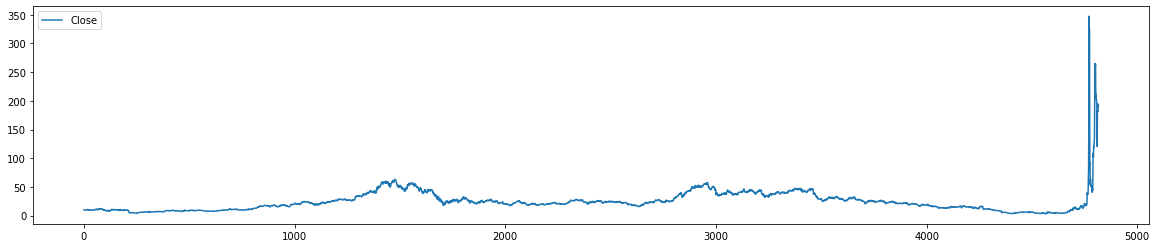

In [96]:
GME['Close'].plot(legend = True, figsize = (20,4))

* Similar trends appearing in all graphs, we can start to see that with time, barring any crisis to a company, the return will always be positive. 
* But this does not really tell us about the risk
* Look into short time intervals, lets say this past year is a good example since the pandemic affected the market greatly

### How much value do we put at risk by investing in a particular company?

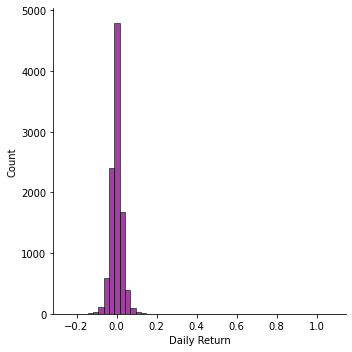

In [102]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].tail()
sns.displot(AAPL['Daily Return'].dropna(),bins = 50, color = 'purple')